In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/kidney_disease.csv')

## <font color='green'>***Pre-Processing***

In [61]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [62]:
df1=df
df2=df
df3=df

<font color='green'> ***filling the null values with mean, median and most frequent value***



In [63]:
df2['age'] = df2["age"].fillna(df2['age'].median())
df2['bp'] = df2["bp"].fillna(df2['bp'].mean())
df2['sg'] = df2["sg"].fillna(df2['sg'].mean())
df2['al'] = df2["al"].fillna(df2['al'].median())
df2['su'] = df2["su"].fillna(df2['su'].median())
df2['bgr'] = df2["bgr"].fillna(df2['bgr'].median())
df2['bu'] = df2["bu"].fillna(df2['bu'].median())
df2['sc'] = df2["sc"].fillna(df2['sc'].median())
df2['sod'] = df2["sod"].fillna(df2['sod'].median())
df2['pot'] = df2["pot"].fillna(df2['pot'].median())
df2['hemo'] = df2["hemo"].fillna(df2['hemo'].median())

In [64]:
most_frequent_category = df2['rbc'].mode().iloc[0]
df2['rbc'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['pc'].mode().iloc[0]
df2['pc'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['pcc'].mode().iloc[0]
df2['pcc'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['ba'].mode().iloc[0]
df2['ba'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['pcv'].mode().iloc[0]
df2['pcv'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['wc'].mode().iloc[0]
df2['wc'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['rc'].mode().iloc[0]
df2['rc'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['htn'].mode().iloc[0]
df2['htn'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['dm'].mode().iloc[0]
df2['dm'].fillna(most_frequent_category,inplace = True)

most_frequent_category = df2['cad'].mode().iloc[0]
df2['cad'].fillna(most_frequent_category,inplace = True)

In [65]:
df2.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             1
pe                1
ane               1
classification    0
dtype: int64

<font color='green'>***Dropping null Values***

In [66]:
df2.dropna(subset =["appet"], inplace =True )
df2.dropna(subset =["pe"], inplace =True )
df2.dropna(subset =["ane"], inplace =True )

In [67]:
df2.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<font color='green'>***Changing the Datatypes***

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le= LabelEncoder()

In [70]:
df2['rbc']= le.fit_transform(df['rbc'])
df2['pc']= le.fit_transform(df['pc'])
df2['pcc']= le.fit_transform(df['pcc'])
df2['ba']= le.fit_transform(df['ba'])
df2['pcv']= le.fit_transform(df['pcv'])
df2['wc']= le.fit_transform(df['wc'])
df2['rc']= le.fit_transform(df['rc'])
df2['htn']= le.fit_transform(df['htn'])
df2['dm']= le.fit_transform(df['dm'])
df2['cad']= le.fit_transform(df['cad'])
df2['appet']= le.fit_transform(df['appet'])
df2['pe']= le.fit_transform(df['pe'])
df2['ane']= le.fit_transform(df['ane'])
df2['classification']= le.fit_transform(df['classification'])


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    int64  
 1   age             399 non-null    float64
 2   bp              399 non-null    float64
 3   sg              399 non-null    float64
 4   al              399 non-null    float64
 5   su              399 non-null    float64
 6   rbc             399 non-null    int64  
 7   pc              399 non-null    int64  
 8   pcc             399 non-null    int64  
 9   ba              399 non-null    int64  
 10  bgr             399 non-null    float64
 11  bu              399 non-null    float64
 12  sc              399 non-null    float64
 13  sod             399 non-null    float64
 14  pot             399 non-null    float64
 15  hemo            399 non-null    float64
 16  pcv             399 non-null    int64  
 17  wc              399 non-null    int

In [72]:
df2['classification'].unique()

array([0, 1, 2])

In [73]:
df2['classification'] = df2['classification'].apply(lambda x: 1 if x > 0 else 0)


In [74]:
rows_with_value = df2[df2['classification'] == 0]
print(rows_with_value)

      id   age     bp        sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  \
0      0  48.0   80.0  1.020000  1.0  0.0    1   1    0   0  ...   32  72  34   
1      1   7.0   50.0  1.020000  4.0  0.0    1   1    0   0  ...   26  56  34   
2      2  62.0   80.0  1.010000  2.0  3.0    1   1    0   0  ...   19  70  34   
3      3  48.0   70.0  1.005000  4.0  0.0    1   0    1   0  ...   20  62  19   
4      4  51.0   80.0  1.010000  2.0  0.0    1   1    0   0  ...   23  68  27   
..   ...   ...    ...       ...  ...  ...  ...  ..  ...  ..  ...  ...  ..  ..   
245  245  48.0  100.0  1.017408  0.0  0.0    1   1    0   0  ...    7  67   5   
246  246  48.0  110.0  1.015000  3.0  0.0    0   1    1   0  ...   14  46   4   
247  247  54.0   90.0  1.025000  1.0  0.0    1   0    0   0  ...   29  90  34   
248  248  59.0   70.0  1.010000  1.0  3.0    0   0    0   0  ...   25   3  22   
249  249  56.0   90.0  1.010000  4.0  1.0    1   0    1   0  ...   43  50   1   

     htn  dm  cad  appet  p

In [75]:
df2['classification'].unique()

array([0, 1])

In [76]:
value_counts = df2.groupby('classification').size().reset_index(name='count')
print(value_counts)

   classification  count
0               0    248
1               1    151


In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
x= df2.drop('classification', axis=1)
y= df2['classification']
smote = SMOTE (random_state= 42)
x_resampled, y_resampled = smote.fit_resample(x,y)
oversampled_df = pd.DataFrame(x_resampled, columns = x.columns)
oversampled_df['classification']= y_resampled

In [79]:
value_counts = oversampled_df.groupby('classification').size().reset_index(name='count')
print(value_counts)

   classification  count
0               0    248
1               1    248


In [80]:
rows_with_value = df2[df2['classification'] == 1]
print(rows_with_value)

      id   age    bp        sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  \
37    37  72.0  80.0  1.017408  0.0  0.0    1   1    0   0  ...   16  64   4   
230  230  65.0  60.0  1.010000  2.0  0.0    1   0    1   0  ...   29  87  34   
250  250  40.0  80.0  1.025000  0.0  0.0    1   1    0   0  ...   36   5  26   
251  251  23.0  80.0  1.025000  0.0  0.0    1   1    0   0  ...   40  90  32   
252  252  45.0  80.0  1.025000  0.0  0.0    1   1    0   0  ...   34  83  28   
..   ...   ...   ...       ...  ...  ...  ...  ..  ...  ..  ...  ...  ..  ..   
395  395  55.0  80.0  1.020000  0.0  0.0    1   1    0   0  ...   35  62  30   
396  396  42.0  70.0  1.025000  0.0  0.0    1   1    0   0  ...   42  72  44   
397  397  12.0  80.0  1.020000  0.0  0.0    1   1    0   0  ...   37  61  36   
398  398  17.0  60.0  1.025000  0.0  0.0    1   1    0   0  ...   39  67  41   
399  399  58.0  80.0  1.025000  0.0  0.0    1   1    0   0  ...   41  63  43   

     htn  dm  cad  appet  pe  ane  clas

# <font color='green'>***Visualization***

<font color='green'>***scatter plot***

In [81]:
pip install matplotlib seaborn plotly

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

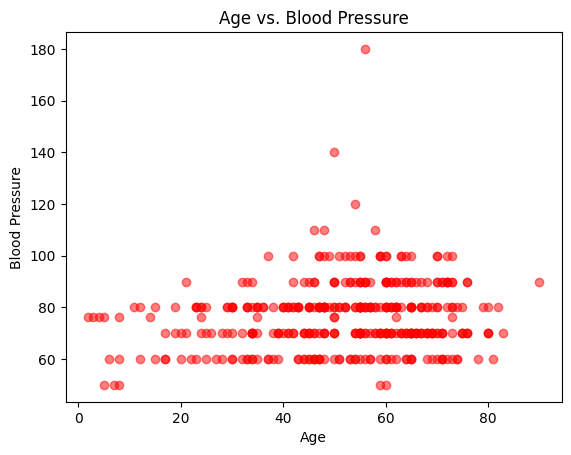

In [83]:
plt.scatter(df2['age'], df2['bp'], color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs. Blood Pressure')
plt.show()

<font color='green'>***histogram***

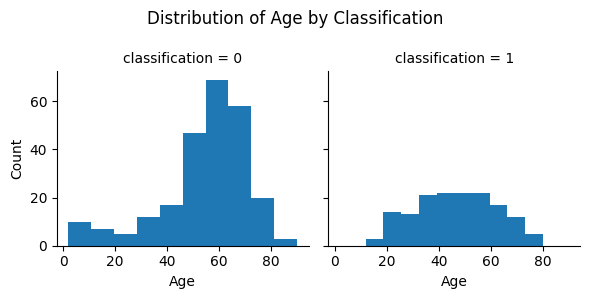

In [84]:
g = sns.FacetGrid(df2, col='classification')
g.map(plt.hist, 'age', bins=10)
g.set_axis_labels('Age', 'Count')
g.fig.suptitle('Distribution of Age by Classification')
plt.tight_layout()
plt.show()

# <font color='green'>***Splitting Data***

In [85]:
X = df2.drop(columns=['classification'])

In [86]:
y = df2['classification']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)


In [89]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (319, 25)
Shape of x_test: (80, 25)
Shape of y_train: (319,)
Shape of y_test: (80,)


# <font color='green'> ***SVM Model***

In [90]:
from sklearn.svm import SVC

In [91]:
svm_model = SVC(kernel='sigmoid', random_state=42)

In [92]:
svm_model.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=42)

In [93]:
y_pred = svm_model.predict(x_test)

# <font color='green'> ***Evaluation***

In [107]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,precision_score,recall_score,f1_score

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [102]:
precision = precision_score(y_test, y_pred)

print("Precision:", precision)

Precision: 0.717948717948718


In [105]:
recall = recall_score(y_test, y_pred)

print("Recall:", recall)

Recall: 0.8484848484848485


In [108]:
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.7777777777777778


In [97]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8072211476466796
